In [9]:
from rxnutils import *
from rdkit.Chem import AllChem
import pandas as pd
import os
import ast
from rxnmapper import RXNMapper
from rdkit import Chem
from chemUtils.synthesis import reaction
import json
from IPython.display import display
from collections import OrderedDict
from prettytable import PrettyTable

In [8]:
# Read df
os.chdir("/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data")
df1 = pd.read_csv("D68EV3CPROA_enumeration_oct10_first_route_1_step.csv", index_col=0)
len(df1)

597

In [9]:
# Get first example of each route
df2 = df1.drop_duplicates(subset=['rxn_order_first_to_last'])
len(df2)

34

<Axes: >

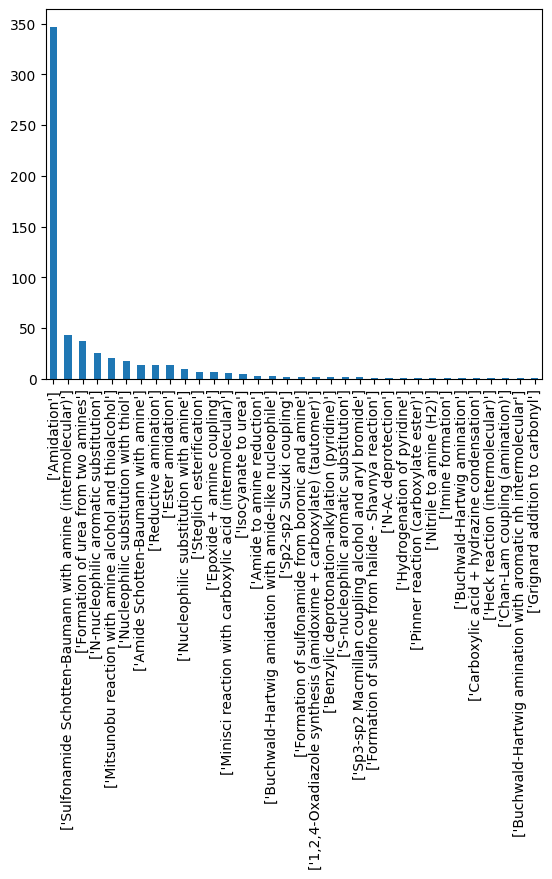

In [10]:
# Show histogram of route counts
df1['rxn_order_first_to_last'].value_counts().plot(kind='bar')

In [11]:
# Top 10 routes
df1['rxn_order_first_to_last'].value_counts()[:10]

['Amidation']                                                   347
['Sulfonamide Schotten-Baumann with amine (intermolecular)']     43
['Formation of urea from two amines']                            37
['N-nucleophilic aromatic substitution']                         25
['Mitsunobu reaction with amine alcohol and thioalcohol']        20
['Nucleophilic substitution with thiol']                         18
['Amide Schotten-Baumann with amine']                            14
['Reductive amination']                                          14
['Ester amidation']                                              14
['Nucleophilic substitution with amine']                         10
Name: rxn_order_first_to_last, dtype: int64

In [31]:
# Make SMARTS for each unique route
from rxnutils.chem.reaction import ChemicalReaction
first = df2.iloc[0]
reactants = ast.literal_eval(first.reactants)[0]

In [53]:
reaction = (
    f"{reactants[0]}.{reactants[1]}>>{first.smiles}"
)
reaction

'NCCc1nnc2ccccn12.Cc1cc2c(cc1N)OCO2>>Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2'

In [82]:
rxnmapper = RXNMapper()
res = rxnmapper.get_attention_guided_atom_maps([reaction])
reaction = res[0]['mapped_rxn']
reaction

'[CH3:1][c:2]1[cH:3][c:4]2[c:5]([cH:6][c:7]1[NH2:8])[O:10][CH2:24][O:25]2.[cH:9]1[cH:18][c:17]2[n:16][n:15][c:14]([CH2:13][CH2:12][NH2:11])[n:22]2[cH:21][cH:20]1>>[CH3:1][c:2]1[cH:3][c:4]2[c:5]([cH:6][c:7]1[NH:8][C:9](=[O:10])[NH:11][CH2:12][CH2:13][c:14]1[n:15][n:16][c:17]3[cH:18][cH:19][cH:20][cH:21][n:22]13)[O:23][CH2:24][O:25]2'

In [69]:
rxn = ChemicalReaction(reaction)
rxn.reactants_list

['[CH3:1][c:2]1[cH:3][c:4]2[c:5]([cH:6][c:7]1[NH2:8])[O:10][CH2:24][O:25]2',
 '[cH:9]1[cH:18][c:17]2[n:16][n:15][c:14]([CH2:13][CH2:12][NH2:11])[n:22]2[cH:21][cH:20]1']

In [70]:
rxn.agents_list

[]

In [87]:
mappings = rxn.generate_reaction_template(radius=1)

In [88]:
mappings[0].smarts

'[#7;a:1]:[#7;a:2]:[c:3]1:[#7;a:4]:[c:5]:[cH;D2;+0:6]:[cH;D2;+0:7]:[cH;D2;+0:8]:1.[C:9]-[NH2;D1;+0:10].[NH2;D1;+0:11]-[c:12]1:[c:13]:[c:14]:[c:15]2:[c;H0;D3;+0:16](:[c:17]:1)-[O;H0;D2;+0:18]-[CH2;D2;+0:19]-[#8:20]-2>>[#7;a:1]:[#7;a:2]:[c:3]1:[#7;a:4]:[c:5]:[cH;D2;+0:6]:[c:21]:[cH;D2;+0:8]:1.[C:9]-[NH;D2;+0:10]-[C;H0;D3;+0:7](=[O;H0;D1;+0:18])-[NH;D2;+0:11]-[c:12]1:[c:13]:[c:14]:[c:15]2:[c;H0;D3;+0:16](:[c:17]:1)-[#8:22]-[CH2;D2;+0:19]-[#8:20]-2'

In [81]:
mappings[1].smarts

'[#7;a:1]:[#7;a:2]:[c:3]1:[#7;a:4]:[c:5]:[cH;D2;+0:6]:[c:21]:[cH;D2;+0:8]:1.[C:9]-[NH;D2;+0:10]-[C;H0;D3;+0:7](=[O;H0;D1;+0:18])-[NH;D2;+0:11]-[c:12]1:[c:13]:[c:14]:[c:15]2:[c;H0;D3;+0:16](:[c:17]:1)-[#8:22]-[CH2;D2;+0:19]-[#8:20]-2>>[#7;a:1]:[#7;a:2]:[c:3]1:[#7;a:4]:[c:5]:[cH;D2;+0:6]:[cH;D2;+0:7]:[cH;D2;+0:8]:1.[C:9]-[NH2;D1;+0:10].[NH2;D1;+0:11]-[c:12]1:[c:13]:[c:14]:[c:15]2:[c;H0;D3;+0:16](:[c:17]:1)-[O;H0;D2;+0:18]-[CH2;D2;+0:19]-[#8:20]-2'

# MAKING SMARTS FOR REACTIONS I DON'T ALREADY HAVE, Mitsunobu reaction with amine alcohol and thioalcohol

In [102]:
from chemUtils.synthesis import reaction
%load_ext autoreload
%autoreload 2
mit = df1.iloc[23]
mit

smiles                                           COc1cc(CNCc2nnc3ccccn23)cc2c1OCO2
num_steps                                                                        1
rxn_order_first_to_last          ['Mitsunobu reaction with amine alcohol and th...
reactants                             [('NCc1nnc2ccccn12', 'COc1cc(CO)cc2c1OCO2')]
BuildingBlocks                   ['COc1cc(CO)cc2c1OCO2', 'COc1cc(CNCc2nnc3ccccn...
catalogName_for_BuildingBlock    ['enamine_made', 'molport', 'mcule', 'enamine_...
Name: 23, dtype: object

In [112]:
reactants = ast.literal_eval(mit.reactants)[0]
product = mit.smiles
mapping = reaction.make_rxn_template(reactants, product, radius=1)
mapping

'O-[CH2;D2;+0:1]-[c:2].[C:3]-[NH2;D1;+0:4]>>[C:3]-[NH;D2;+0:4]-[CH2;D2;+0:1]-[c:2]'

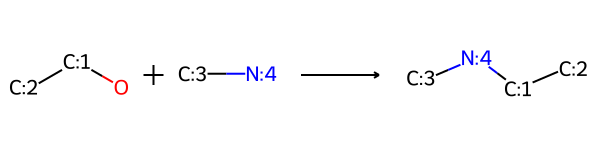

In [113]:
rxn_smarts = AllChem.ReactionFromSmarts(mapping)
rxn_smarts

In [176]:
# Get all routes smarts into dictionary
from tqdm import tqdm
smarts_dict = {}
for i in tqdm(range(len(df1))):
    row = df1.iloc[i]
    name = ast.literal_eval(row.rxn_order_first_to_last)[0]
    reactants = ast.literal_eval(row.reactants)[0]
    product = row.smiles
    mapping = reaction.make_rxn_template(reactants, product, radius=1)
    if name not in smarts_dict:
        smarts_dict[name] = [{mapping: 0}]
    else:
        smarts_dict[name].append({mapping: 0})

100%|██████████| 597/597 [01:03<00:00,  9.42it/s]


In [177]:
smarts_dict

{'Formation of urea from two amines': [{'[#7;a:1]:[#7;a:2]:[c:3]1:[#7;a:4]:[c:5]:[cH;D2;+0:6]:[cH;D2;+0:7]:[cH;D2;+0:8]:1.[C:9]-[NH2;D1;+0:10].[NH2;D1;+0:11]-[c:12]1:[c:13]:[c:14]:[c:15]2:[c;H0;D3;+0:16](:[c:17]:1)-[O;H0;D2;+0:18]-[CH2;D2;+0:19]-[#8:20]-2>>[#7;a:1]:[#7;a:2]:[c:3]1:[#7;a:4]:[c:5]:[cH;D2;+0:6]:[c:21]:[cH;D2;+0:8]:1.[C:9]-[NH;D2;+0:10]-[C;H0;D3;+0:7](=[O;H0;D1;+0:18])-[NH;D2;+0:11]-[c:12]1:[c:13]:[c:14]:[c:15]2:[c;H0;D3;+0:16](:[c:17]:1)-[#8:22]-[CH2;D2;+0:19]-[#8:20]-2': 0},
  {'[C:1]-[NH2;D1;+0:2].[NH2;D1;+0:3]-[C:4]-[c:5]1:[c:6]:[c;H0;D3;+0:7]2:[c;H0;D3;+0:8](:[cH;D2;+0:9]:[c:10]:1)-[O;H0;D2;+0:11]-[CH2;D2;+0:12]-[#8:13]-2>>[C:1]-[NH;D2;+0:2]-[C;H0;D3;+0:8](=[O;H0;D1;+0:11])-[NH;D2;+0:3]-[C:4]-[c:5]1:[c:6]:[c;H0;D3;+0:7]2:[c:14](:[cH;D2;+0:9]:[c:10]:1)-[#8:15]-[CH2;D2;+0:12]-[#8:13]-2': 0},
  {'[#7;a:1]:[#7;a:2]:[c:3](:[#7;a:4])-[CH;D3;+0:5](-[C;D1;H3:6])-[NH2;D1;+0:7].[NH2;D1;+0:8]-[c:9]1:[c:10]:[c:11]:[c:12]2:[c;H0;D3;+0:13](:[c:14]:1)-[O;H0;D2;+0:15]-[CH2;D2;+0:16]-

In [148]:

len(smarts_dict['Amidation'])

347

In [151]:
smarts_dict
data = smarts_dict
data

{'Formation of urea from two amines': [{'[#7;a:1]:[#7;a:2]:[c:3]1:[#7;a:4]:[c:5]:[cH;D2;+0:6]:[cH;D2;+0:7]:[cH;D2;+0:8]:1.[C:9]-[NH2;D1;+0:10].[NH2;D1;+0:11]-[c:12]1:[c:13]:[c:14]:[c:15]2:[c;H0;D3;+0:16](:[c:17]:1)-[O;H0;D2;+0:18]-[CH2;D2;+0:19]-[#8:20]-2>>[#7;a:1]:[#7;a:2]:[c:3]1:[#7;a:4]:[c:5]:[cH;D2;+0:6]:[c:21]:[cH;D2;+0:8]:1.[C:9]-[NH;D2;+0:10]-[C;H0;D3;+0:7](=[O;H0;D1;+0:18])-[NH;D2;+0:11]-[c:12]1:[c:13]:[c:14]:[c:15]2:[c;H0;D3;+0:16](:[c:17]:1)-[#8:22]-[CH2;D2;+0:19]-[#8:20]-2': 0},
  {'[C:1]-[NH2;D1;+0:2].[NH2;D1;+0:3]-[C:4]-[c:5]1:[c:6]:[c;H0;D3;+0:7]2:[c;H0;D3;+0:8](:[cH;D2;+0:9]:[c:10]:1)-[O;H0;D2;+0:11]-[CH2;D2;+0:12]-[#8:13]-2>>[C:1]-[NH;D2;+0:2]-[C;H0;D3;+0:8](=[O;H0;D1;+0:11])-[NH;D2;+0:3]-[C:4]-[c:5]1:[c:6]:[c;H0;D3;+0:7]2:[c:14](:[cH;D2;+0:9]:[c:10]:1)-[#8:15]-[CH2;D2;+0:12]-[#8:13]-2': 0},
  {'[#7;a:1]:[#7;a:2]:[c:3](:[#7;a:4])-[CH;D3;+0:5](-[C;D1;H3:6])-[NH2;D1;+0:7].[NH2;D1;+0:8]-[c:9]1:[c:10]:[c:11]:[c:12]2:[c;H0;D3;+0:13](:[c:14]:1)-[O;H0;D2;+0:15]-[CH2;D2;+0:16]-

In [152]:
# Get a set of all unique reactions
all_reactions = {list(reactions.keys())[0] for reactions in data.values() for description in data.keys()}

# Check for and remove duplicate reactions from the dictionary
for description, reactions_list in data.items():
    seen_reactions = set()
    unique_reactions = []
    for reaction_dict in reactions_list:
        reaction = list(reaction_dict.keys())[0]
        if reaction not in seen_reactions:
            seen_reactions.add(reaction)
            unique_reactions.append(reaction_dict)
    data[description] = unique_reactions

AttributeError: 'list' object has no attribute 'keys'

In [149]:
# Remove redundant SMARTS for each reaction
for key in smarts_dict:
    smarts_dict[key] = list(set(smarts_dict[key]))

TypeError: unhashable type: 'dict'

In [136]:
smarts_dict

{'Formation of urea from two amines': ['[C:1]-[NH;D2;+0:2]-[C:3].[NH2;D1;+0:4]-[c:5]1:[c:6]:[c:7]:[c;H0;D3;+0:8]2:[c:9](:[c:10]:1)-[#8:11]-[CH2;D2;+0:12]-[CH2;D2;+0:13]-[O;H0;D2;+0:14]-2>>[C:1]-[N;H0;D3;+0:2](-[C:3])-[C;H0;D3;+0:13](=[O;H0;D1;+0:14])-[NH;D2;+0:4]-[c:5]1:[c:6]:[c:7]:[c;H0;D3;+0:8]2:[c:9](:[c:10]:1)-[#8:11]-[CH2;D2;+0:12]-[C:15]-[#8:16]-2',
  '[C;D1;H3:1]-[CH;D3;+0:2](-[NH2;D1;+0:3])-[c:4]1:[#7;a:5]:[#7;a:6]:[c:7]2:[cH;D2;+0:8]:[cH;D2;+0:9]:[cH;D2;+0:10]:[c:11]:[#7;a:12]:1:2.[NH2;D1;+0:13]-[c:14]1:[c:15]:[cH;D2;+0:16]:[o;H0;D2;+0:17]:[n;H0;D2;+0:18]:1>>[C;D1;H3:1]-[C@H;D3;+0:2](-[NH;D2;+0:3]-[C;H0;D3;+0:9](=[O;H0;D1;+0:17])-[NH;D2;+0:13]-[c:14]1:[c:15]:[cH;D2;+0:16]:[#8;a:19]:[n;H0;D2;+0:18]:1)-[c:4]1:[#7;a:5]:[#7;a:6]:[c:7]2:[cH;D2;+0:8]:[c:20]:[cH;D2;+0:10]:[c:11]:[#7;a:12]:1:2',
  '[C;D1;H3:1]-[c;H0;D3;+0:2]1:[c:3]:[c:4](-[NH2;D1;+0:5]):[n;H0;D2;+0:6]:[o;H0;D2;+0:7]:1.[C:8]-[CH;D3;+0:9](-[NH2;D1;+0:10])-[c:11]1:[#7;a:12]:[#7;a:13]:[c:14]2:[cH;D2;+0:15]:[cH;D2;+0:16]:[

In [133]:
len(smarts_dict['Amidation'])

151

In [137]:
# Get Reaction Smart that works for every route with that name
from rdkit import Chem
from rdkit.Chem import AllChem

# Define the reaction in SMARTS format
reaction_smarts = '[C:1]-[NH;D2;+0:2]-[C:3].[NH2;D1;+0:4]-[c:5]1:[c:6]:[c:7]:[c;H0;D3;+0:8]2:[c:9](:[c:10]:1)-[#8:11]-[CH2;D2;+0:12]-[CH2;D2;+0:13]-[O;H0;D2;+0:14]-2>>[C:1]-[N;H0;D3;+0:2](-[C:3])-[C;H0;D3;+0:13](=[O;H0;D1;+0:14])-[NH;D2;+0:4]-[c:5]1:[c:6]:[c:7]:[c;H0;D3;+0:8]2:[c:9](:[c:10]:1)-[#8:11]-[CH2;D2;+0:12]-[C:15]-[#8:16]-2' 

# Define the reactants and products as SMILES
reactant_smiles = ['NCc1nnc2cc(C(F)(F)F)ccn12', 'NCc1ccc2c(c1)OCO2']
product_smiles = "O=C(NCc1ccc2c(c1)OCO2)NCc1nnc2cc(C(F)(F)F)ccn12"

# Convert SMILES to molecule objects
reactants = [Chem.MolFromSmiles(smiles) for smiles in reactant_smiles]
products = [Chem.MolFromSmiles(smiles) for smiles in product_smiles]

# Convert the SMARTS string to a reaction object
rxn = AllChem.ReactionFromSmarts(reaction_smarts)

# Check if the reaction is applicable
if rxn.RunReactants(reactants):
    # Try applying the reaction to the reactants
    predicted_products_list = rxn.RunReactants(reactants)

    # Convert tuple of predicted products (since multiple product sets might be possible) to a flat list
    predicted_products_flat = [Chem.MolToSmiles(mol) for products in predicted_products_list for mol in products]

    # Check if any of the predicted products matches the provided product SMILES
    if any(smiles == Chem.MolToSmiles(Chem.MolFromSmiles(product_smiles)) for smiles in predicted_products_flat):
        print("The reaction SMARTS is applicable and produces the expected product.")
        return 1
    else:
        print("The reaction SMARTS is applicable but does not produce the expected product.")
        return 0
else:
    print("The reaction SMARTS is not applicable to the provided reactants.")
    return 0


The reaction SMARTS is not applicable to the provided reactants.


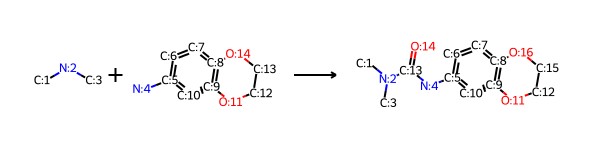

In [138]:
AllChem.ReactionFromSmarts(reaction_smarts)

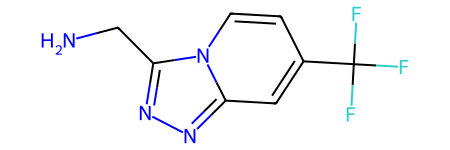

In [139]:
Chem.MolFromSmiles(reactant_smiles[0])

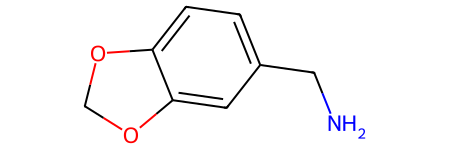

In [140]:
Chem.MolFromSmiles(reactant_smiles[1])

In [175]:
smarts_dict

{'Br-[Mg]-[c;H0;D3;+0:1](:[c:2]):[c:3]:[#7;a:4].[#7;a:5]:[#8;a:6]:[c:7]-[C;H0;D3;+0:8](-[C;D1;H3:9])=[O;H0;D1;+0:10]>>[#7;a:5]:[#8;a:6]:[c:7]-[C@;H0;D4;+0:8](-[C;D1;H3:9])(-[OH;D1;+0:10])-[c;H0;D3;+0:1](:[c:2]):[c:3]:[#7;a:4]': 0}

In [178]:
# Find the SMARTS that works for the most routes
# Add number of routes smarts worked for to each value
worked = 0
prod_no = 0
react_no = 0
for i in tqdm(range(len(df1))):
    row = df1.iloc[i]
    name = ast.literal_eval(row.rxn_order_first_to_last)[0]
    reactants = ast.literal_eval(row.reactants)[0]
    product = row.smiles
    for i in smarts_dict[name]:
        rxn_temp = list(i.keys())[0]
        outcome = reaction.check_rxn_template_works(rxn_temp, reactants, product)
        if outcome == 1:
            #print('Found one that works for ', name)
            i[rxn_temp] += 1
            worked += 1
        elif outcome == -1:
            prod_no += 1
        elif outcome == 0:
            react_no += 1
print(f"{worked} SUCCESS")
print(f"{prod_no} INCORRECT PRODUCT")
print(f"{react_no} INCORRECT REACTANTS")

100%|██████████| 597/597 [00:22<00:00, 26.16it/s]

4963 SUCCESS
4542 INCORRECT PRODUCT
116372 INCORRECT REACTANTS


In [181]:
# Save smarts dict with count to json
os.chdir('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data')
with open('all_single_step_smarts_counts.json', 'w') as f:
    json.dump(smarts_dict, f)

In [201]:
with open('all_single_step_smarts_counts.json', 'r') as f:
    smarts_dict = json.load(f)
smarts_dict

{'Formation of urea from two amines': [{'[#7;a:1]:[#7;a:2]:[c:3]1:[#7;a:4]:[c:5]:[cH;D2;+0:6]:[cH;D2;+0:7]:[cH;D2;+0:8]:1.[C:9]-[NH2;D1;+0:10].[NH2;D1;+0:11]-[c:12]1:[c:13]:[c:14]:[c:15]2:[c;H0;D3;+0:16](:[c:17]:1)-[O;H0;D2;+0:18]-[CH2;D2;+0:19]-[#8:20]-2>>[#7;a:1]:[#7;a:2]:[c:3]1:[#7;a:4]:[c:5]:[cH;D2;+0:6]:[c:21]:[cH;D2;+0:8]:1.[C:9]-[NH;D2;+0:10]-[C;H0;D3;+0:7](=[O;H0;D1;+0:18])-[NH;D2;+0:11]-[c:12]1:[c:13]:[c:14]:[c:15]2:[c;H0;D3;+0:16](:[c:17]:1)-[#8:22]-[CH2;D2;+0:19]-[#8:20]-2': 0},
  {'[C:1]-[NH2;D1;+0:2].[NH2;D1;+0:3]-[C:4]-[c:5]1:[c:6]:[c;H0;D3;+0:7]2:[c;H0;D3;+0:8](:[cH;D2;+0:9]:[c:10]:1)-[O;H0;D2;+0:11]-[CH2;D2;+0:12]-[#8:13]-2>>[C:1]-[NH;D2;+0:2]-[C;H0;D3;+0:8](=[O;H0;D1;+0:11])-[NH;D2;+0:3]-[C:4]-[c:5]1:[c:6]:[c;H0;D3;+0:7]2:[c:14](:[cH;D2;+0:9]:[c:10]:1)-[#8:15]-[CH2;D2;+0:12]-[#8:13]-2': 2},
  {'[#7;a:1]:[#7;a:2]:[c:3](:[#7;a:4])-[CH;D3;+0:5](-[C;D1;H3:6])-[NH2;D1;+0:7].[NH2;D1;+0:8]-[c:9]1:[c:10]:[c:11]:[c:12]2:[c;H0;D3;+0:13](:[c:14]:1)-[O;H0;D2;+0:15]-[CH2;D2;+0:16]-

In [239]:
# Get SMARTS pattern with max value for each reaction name
# max_smarts = {name: [(smarts, count), (smarts, count), n]}
# What if multiple of same max value? Get them all. 
max_smarts = {}
for reaction_name, smarts_list in smarts_dict.items():
    entries = [temp_dict.values() for temp_dict in smarts_list]
    entries = [list(dv)[0] for dv in entries]
    max_score = max(entries)
    max_entries = []
    for temp_dict in smarts_list:
        for smarts, score in temp_dict.items():
            if score == max_score:
                max_entries.append((smarts, score))
    max_smarts[reaction_name] = max_entries
print(max_smarts)

{'Formation of urea from two amines': [('[C:1]-[NH2;D1;+0:2].[NH2;D1;+0:3]-[C:4]-[c:5]1:[c:6]:[c;H0;D3;+0:7]2:[c;H0;D3;+0:8](:[cH;D2;+0:9]:[c:10]:1)-[O;H0;D2;+0:11]-[CH2;D2;+0:12]-[#8:13]-2>>[C:1]-[NH;D2;+0:2]-[C;H0;D3;+0:8](=[O;H0;D1;+0:11])-[NH;D2;+0:3]-[C:4]-[c:5]1:[c:6]:[c;H0;D3;+0:7]2:[c:14](:[cH;D2;+0:9]:[c:10]:1)-[#8:15]-[CH2;D2;+0:12]-[#8:13]-2', 2), ('[C:1]-[NH2;D1;+0:2].[NH2;D1;+0:3]-[C:4]-[c:5]1:[c:6]:[c:7]:[c;H0;D3;+0:8]2:[c;H0;D3;+0:9](:[cH;D2;+0:10]:1)-[O;H0;D2;+0:11]-[CH2;D2;+0:12]-[#8:13]-2>>[C:1]-[NH;D2;+0:2]-[C;H0;D3;+0:9](=[O;H0;D1;+0:11])-[NH;D2;+0:3]-[C:4]-[c:5]1:[c:6]:[c:7]:[c;H0;D3;+0:8]2:[c:14](:[cH;D2;+0:10]:1)-[#8:15]-[CH2;D2;+0:12]-[#8:13]-2', 2), ('[C:1]-[NH2;D1;+0:2].[NH2;D1;+0:3]-[C:4]-[c:5]1:[c:6]:[c;H0;D3;+0:7]2:[c;H0;D3;+0:8](:[cH;D2;+0:9]:[c:10]:1)-[O;H0;D2;+0:11]-[CH2;D2;+0:12]-[#8:13]-2>>[C:1]-[NH;D2;+0:2]-[C;H0;D3;+0:8](=[O;H0;D1;+0:11])-[NH;D2;+0:3]-[C:4]-[c:5]1:[c:6]:[c;H0;D3;+0:7]2:[c:14](:[cH;D2;+0:9]:[c:10]:1)-[#8:15]-[CH2;D2;+0:12]-[#8:13]-2',

In [240]:
# Save max smarts dict to json
os.chdir('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data')
with open('all_single_step_max_smarts.json', 'w') as f:
    json.dump(max_smarts, f)

In [254]:
# Look at smarts for each reaction name
for name, smarts_list in max_smarts.items():
    print(name)
    for smarts, count in smarts_list:
        # Display the reaction SMARTS
        #display(AllChem.ReactionFromSmarts(smarts))
        continue

Formation of urea from two amines
Sulfonamide Schotten-Baumann with amine (intermolecular)
Epoxide + amine coupling
Amidation
Reductive amination
Nucleophilic substitution with thiol
N-nucleophilic aromatic substitution
Mitsunobu reaction with amine alcohol and thioalcohol
Ester amidation
Benzylic deprotonation-alkylation (pyridine)
Sp2-sp2 Suzuki coupling
Minisci reaction with carboxylic acid (intermolecular)
Isocyanate to urea
Amide Schotten-Baumann with amine
Formation of sulfonamide from boronic and amine
Amide to amine reduction
1,2,4-Oxadiazole synthesis (amidoxime + carboxylate) (tautomer)
Steglich esterification
Buchwald-Hartwig amination with aromatic nh intermolecular
Nucleophilic substitution with amine
Chan-Lam coupling (amination)
S-nucleophilic aromatic substitution
Imine formation
Heck reaction (intermolecular)
Carboxylic acid + hydrazine condensation
Buchwald-Hartwig amidation with amide-like nucleophile
Sp3-sp2 Macmillan coupling alcohol and aryl bromide
Buchwald-Hartw

1
Cl-[CH2;D2;+0:1]-[c:2](:[#7;a:3]):[#7;a:4]:[#7;a:5].[C:6]-[#8:7]-[c:8]1:[c:9]:[c:10]:[c:11](-[C:12]-[NH;D2;+0:13]-[C;D1;H3:14]):[c:15]:[c:16]:1>>[#7;a:5]:[#7;a:4]:[c:2](:[#7;a:3])-[CH2;D2;+0:1]-[N;H0;D3;+0:13](-[C;D1;H3:14])-[C:12]-[c:11]1:[c:10]:[c:9]:[c:8](-[#8:7]-[C:6]):[c:16]:[c:15]:1


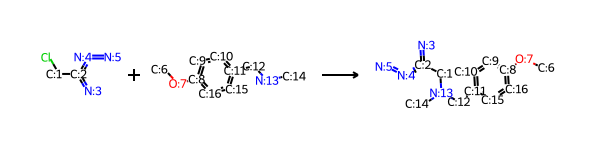

1
Cl-[CH;D3;+0:1](-[C:2])-[C:3].[C:4]-[NH;D2;+0:5]-[C:6]>>[C:2]-[CH;D3;+0:1](-[C:3])-[N;H0;D3;+0:5](-[C:4])-[C:6]


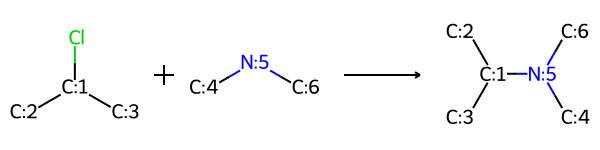

1
Cl-[CH2;D2;+0:1]-[C:2].[#8;a:3]:[#7;a:4]:[c:5]-[NH2;D1;+0:6]>>[#8;a:3]:[#7;a:4]:[c:5]-[NH;D2;+0:6]-[CH2;D2;+0:1]-[C:2]


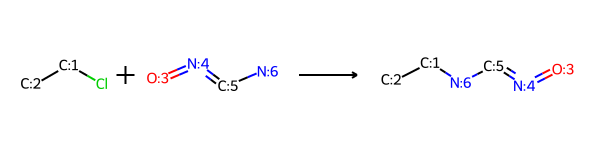

1
Cl-[CH2;D2;+0:1]-[c:2](:[#7;a:3]):[#7;a:4]:[#7;a:5].[C:6]-[NH;D2;+0:7]-[C:8]>>[#7;a:3]:[c:2](:[#7;a:4]:[#7;a:5])-[CH2;D2;+0:1]-[N;H0;D3;+0:7](-[C:6])-[C:8]


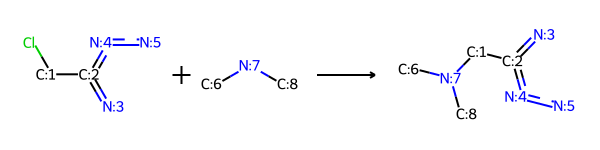

1
Cl-[CH2;D2;+0:1]-[C:2].[#7;a:3]:[nH;D2;+0:4]:[c:5]>>[#7;a:3]:[n;H0;D3;+0:4](:[c:5])-[CH2;D2;+0:1]-[C:2]


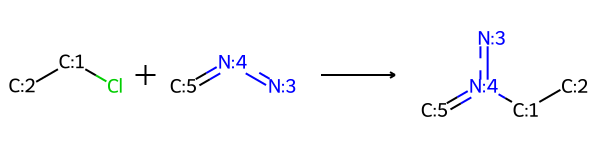

1
Cl-[CH2;D2;+0:1]-[C:2].[#7;a:3]:[nH;D2;+0:4]:[c:5]>>[#7;a:3]:[n;H0;D3;+0:4](:[c:5])-[CH2;D2;+0:1]-[C:2]


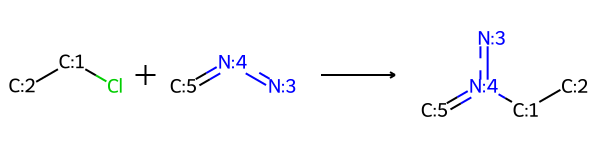

In [529]:
for smarts, count in max_smarts['Nucleophilic substitution with amine']:
    # Display the reaction SMARTS
    print(count)
    print(smarts)
    display(AllChem.ReactionFromSmarts(smarts))

In [456]:
reaction_smarts = {k.replace(' ', '_'): v for k, v in reaction_smarts.items()}

In [494]:
reaction_smarts

{'Amidation': '[#6:1](=[#8:2])-[#8;H1].[#7&X3;!$(NC=*);!$(NS):3]>>[#6:1](=[#8:2])-[#7:3]',
 'Amide_schotten-baumann': '[#7;H2,H1:3].[#6:1](=[#8:2])-[#17]>>[#6:1](=[#8:2])-[#7:3]',
 'Reductive_amination': '[#6:2](=[#8])(-[#6:1]).[#7;H2,H1:3]>>[#6:2](-[#6:1])-[#7:3]',
 'N-nucleophilic_aromatic_substitution': '[#6:3]-[#7;H3,H2,H1:2].[c:1]-[F,Cl,Br,I]>>[#6:3]-[#7:2]-[c:1]',
 'Sp2-sp2_Suzuki_coupling': '[c:1]-[F,Cl,Br,I].[#6:2]-[B]>>[c:1]-[#6:2]',
 'Formation_of_urea_from_two_amines': '[N&X3;H2,H1;!$(NC=O):3].[N&X3;H2,H1;!$(NC=O):4]>>[#7&X3:3]-[#6](=[#8])-[#7&X3:4]',
 'Sulfonamide_Schotten-Baumann_with_amine_(intermolecular)': '[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])[#17,#9].[#7&X3;H2,H1;!$(NC=*);!$(NS):5]>>[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])-[#7:5]',
 'Buchwald-Hartwig_amination': '[ar:1]-[Cl,Br,I].[#7&X3;H2,H1;!$(NC=*);!$(NS);!$(NN):7]>>[ar:1]-[N:7]',
 'Epoxide_+_amine_coupling': '[C:1]-[CH;D3;+0:2]1-[CH2;D2;+0:3]-[O;H0;D2;+0:4]-1.[C:5]-[NH;D2;+0:6]-[C:7]>>[C:1]-[C;D3;+0:2](-[OH;D1;

In [556]:
reaction_smarts['Nucleophilic_substitution_with_amine'] = "[Cl,Br]-[C;H2,H1;+0:1].[#7&X3;H2,H1;+0:5]>>[#7&X3;+0:5]-[C&X4;+0:1]"
reaction_smarts

{'Amidation': '[#6:1](=[#8:2])-[#8;H1].[#7&X3;!$(NC=*);!$(NS):3]>>[#6:1](=[#8:2])-[#7:3]',
 'Amide_schotten-baumann': '[#7;H2,H1:3].[#6:1](=[#8:2])-[#17]>>[#6:1](=[#8:2])-[#7:3]',
 'Reductive_amination': '[#6:2](=[#8])(-[#6:1]).[#7;H2,H1:3]>>[#6:2](-[#6:1])-[#7:3]',
 'N-nucleophilic_aromatic_substitution': '[#6:3]-[#7;H3,H2,H1:2].[c:1]-[F,Cl,Br,I]>>[#6:3]-[#7:2]-[c:1]',
 'Sp2-sp2_Suzuki_coupling': '[c:1]-[F,Cl,Br,I].[#6:2]-[B]>>[c:1]-[#6:2]',
 'Formation_of_urea_from_two_amines': '[N&X3;H2,H1;!$(NC=O):3].[N&X3;H2,H1;!$(NC=O):4]>>[#7&X3:3]-[#6](=[#8])-[#7&X3:4]',
 'Sulfonamide_Schotten-Baumann_with_amine_(intermolecular)': '[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])[#17,#9].[#7&X3;H2,H1;!$(NC=*);!$(NS):5]>>[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])-[#7:5]',
 'Buchwald-Hartwig_amination': '[ar:1]-[Cl,Br,I].[#7&X3;H2,H1;!$(NC=*);!$(NS);!$(NN):7]>>[ar:1]-[N:7]',
 'Epoxide_+_amine_coupling': '[C:1]-[CH;D3;+0:2]1-[CH2;D2;+0:3]-[O;H0;D2;+0:4]-1.[C:5]-[NH;D2;+0:6]-[C:7]>>[C:1]-[C;D3;+0:2](-[OH;D1;

In [557]:
# Save max smarts dict to json
os.chdir('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data')
with open('all_single_step_max_smarts.json', 'w') as f:
    json.dump(max_smarts, f)
with open('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/RXN_SMARTS_CONSTANTS.json', 'w') as f:
    json.dump(reaction_smarts, f)

In [553]:
# Need to check that all reactions in df1 with the name in constants works for the smarts
# Get all routes smarts into dictionary
from tqdm import tqdm
smarts_dict = {}
for i in range(len(df1)):
    row = df1.iloc[i]
    name = ast.literal_eval(row.rxn_order_first_to_last)[0]
    reactants = ast.literal_eval(row.reactants)[0]
    #reactants = [Chem.MolFromSmiles(reactant) for reactant in reactants]
    product = row.smiles
    if name == 'Nucleophilic substitution with amine':
        smarts_name = name.replace(' ', '_')
        mapping = reaction_smarts[smarts_name]
        if Chem.MolFromSmiles(reactants[0]).GetNumAtoms() == 1 or Chem.MolFromSmiles(reactants[1]).GetNumAtoms() == 1:
            print('ONE ATOM REACTANT')
            continue
        outcome = reaction.check_rxn_template_works(mapping, reactants, product, verbose=True)
        print(outcome)
        if outcome[0] != 1:
            print('FAILED')
            print(row)
            display(Chem.MolFromSmiles(reactants[0]))
            display(Chem.MolFromSmiles(reactants[1]))
            #display(Chem.MolFromSmiles(product))
            if outcome[0] == 0:
                print('NO PREDICTED PRODUCT')
                for i in outcome[1]:
                    display(Chem.MolFromSmiles(i))
                print('PROPER PRODUCT IS BELOW')
                display(Chem.MolFromSmiles(product))
            else:
                print('PREDICTED PRODUCT(S)')
                for i in outcome[1]:
                    display(Chem.MolFromSmiles(i))
                print(outcome[0])
            break

The reaction SMARTS is applicable and produces the expected product.
outcome of first combo ['CN(Cc1ccc2c(c1)OCO2)Cc1nnc2ccccn12']
The reaction SMARTS is not applicable to the provided reactants.
outcome of second combo []
(1, ['CN(Cc1ccc2c(c1)OCO2)Cc1nnc2ccccn12'])
The reaction SMARTS is applicable and produces the expected product.
outcome of first combo ['C1CCN(C2CN(C3CCNCC3)C2)CC1']
The reaction SMARTS is not applicable to the provided reactants.
outcome of second combo []
(1, ['C1CCN(C2CN(C3CCNCC3)C2)CC1'])
The reaction SMARTS is applicable and produces the expected product.
outcome of first combo ['Cc1cc(C(=O)N(CC(=O)N2CCCCC2)CC(O)CN)no1', 'Cc1cc(C(=O)NCC(O)CNCC(=O)N2CCCCC2)no1']
The reaction SMARTS is not applicable to the provided reactants.
outcome of second combo []
(1, ['Cc1cc(C(=O)N(CC(=O)N2CCCCC2)CC(O)CN)no1', 'Cc1cc(C(=O)NCC(O)CNCC(=O)N2CCCCC2)no1'])
The reaction SMARTS is not applicable to the provided reactants.
outcome of first combo []
The reaction SMARTS is applicabl

[15:47:08] Mismatched potential rlabels: 1 unmapped reactant dummy atom rlabels,0 unmappped product dummy atom rlabels
[15:47:08] Mismatched potential rlabels: 1 unmapped reactant dummy atom rlabels,0 unmappped product dummy atom rlabels
[15:47:08] Mismatched potential rlabels: 1 unmapped reactant dummy atom rlabels,0 unmappped product dummy atom rlabels
[15:47:08] Mismatched potential rlabels: 1 unmapped reactant dummy atom rlabels,0 unmappped product dummy atom rlabels
[15:47:08] Mismatched potential rlabels: 1 unmapped reactant dummy atom rlabels,0 unmappped product dummy atom rlabels
[15:47:08] Mismatched potential rlabels: 1 unmapped reactant dummy atom rlabels,0 unmappped product dummy atom rlabels
[15:47:08] Mismatched potential rlabels: 1 unmapped reactant dummy atom rlabels,0 unmappped product dummy atom rlabels
[15:47:08] Mismatched potential rlabels: 1 unmapped reactant dummy atom rlabels,0 unmappped product dummy atom rlabels
[15:47:08] Mismatched potential rlabels: 1 unmap

[14:52:52] Mismatched potential rlabels: 1 unmapped reactant dummy atom rlabels,0 unmappped product dummy atom rlabels


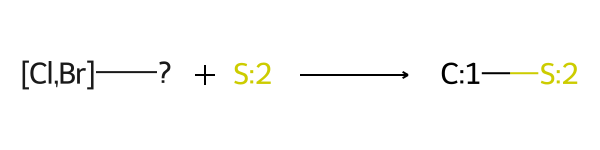

In [492]:
rxn = AllChem.ReactionFromSmarts(reaction_smarts['Nucleophilic_substitution_with_thiol'])
AllChem.SanitizeRxn(rxn)
AllChem.ReactionToSmarts(rxn)
rxn

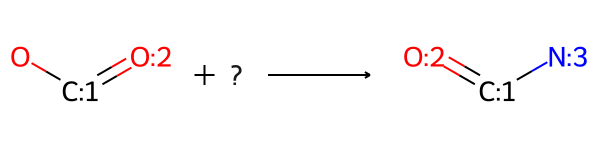

In [370]:
import logging
from rdkit import RDLogger

# Configure RDKit logger
lg = RDLogger.logger()
lg.setLevel(RDLogger.DEBUG)

# Redirect logs to a file
logging.basicConfig(filename="rdkit.log", level=logging.DEBUG)

rxn = AllChem.ReactionFromSmarts(reaction_smarts['Amidation'])
AllChem.SanitizeRxn(rxn)
rxn

In [405]:
reactants = ['NCc1nnc2ccccn12', 'Cc1ccc(CCS(=O)(=O)Cl)cc1']
rxn_temp = "[*]-[#16X4:1](=[OX1:2])(=[OX1:3])(-[#17]).[#7:5]>>[*]-[#16X4:1](=[OX1:2])(=[OX1:3])-[#7:5]"
rxn = AllChem.ReactionFromSmarts(rxn_temp)
reactants = [Chem.MolFromSmiles(reactant) for reactant in reactants]
reactants = tuple(reactants)
reactants

(<rdkit.Chem.rdchem.Mol at 0x295a02dd0>,
 <rdkit.Chem.rdchem.Mol at 0x295a02270>)

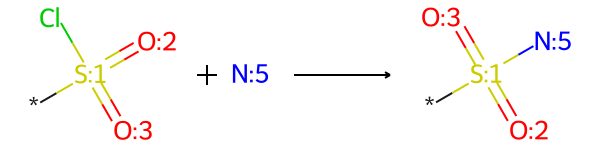

In [406]:
rxn

In [407]:
AllChem.SanitizeRxn(rxn)
rxn.RunReactants(reactants)

()

In [411]:
reactants2 = (reactants[1], reactants[0])
rxn.RunReactants(reactants2)

((<rdkit.Chem.rdchem.Mol at 0x295a02e40>,),
 (<rdkit.Chem.rdchem.Mol at 0x295a02cf0>,),
 (<rdkit.Chem.rdchem.Mol at 0x295a02900>,),
 (<rdkit.Chem.rdchem.Mol at 0x295963040>,),
 (<rdkit.Chem.rdchem.Mol at 0x2959630b0>,),
 (<rdkit.Chem.rdchem.Mol at 0x295963120>,),
 (<rdkit.Chem.rdchem.Mol at 0x295963190>,),
 (<rdkit.Chem.rdchem.Mol at 0x295963200>,))

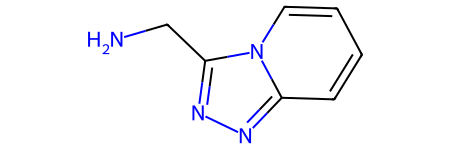

In [409]:
reactants[0]

In [ ]:
reactants

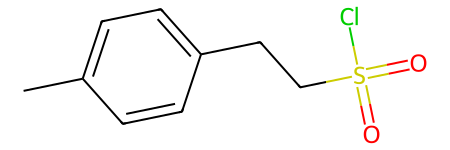

In [410]:
reactants[1]

In [493]:
smarts_dict

{}

In [575]:
# GET LIST OF REACTIONS I AM NOT DOING
with open('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data/all_single_step_smarts_counts.json', 'r') as f:
    max_smarts = json.load(f)
reaction_smarts.keys()
reaction_names_done = list(reaction_smarts.keys())
total_reactions = [x.replace(' ', '_') for x in max_smarts.keys()]
total_reactions

['Formation_of_urea_from_two_amines',
 'Sulfonamide_Schotten-Baumann_with_amine_(intermolecular)',
 'Epoxide_+_amine_coupling',
 'Amidation',
 'Reductive_amination',
 'Nucleophilic_substitution_with_thiol',
 'N-nucleophilic_aromatic_substitution',
 'Mitsunobu_reaction_with_amine_alcohol_and_thioalcohol',
 'Ester_amidation',
 'Benzylic_deprotonation-alkylation_(pyridine)',
 'Sp2-sp2_Suzuki_coupling',
 'Minisci_reaction_with_carboxylic_acid_(intermolecular)',
 'Isocyanate_to_urea',
 'Amide_Schotten-Baumann_with_amine',
 'Formation_of_sulfonamide_from_boronic_and_amine',
 'Amide_to_amine_reduction',
 '1,2,4-Oxadiazole_synthesis_(amidoxime_+_carboxylate)_(tautomer)',
 'Steglich_esterification',
 'Buchwald-Hartwig_amination_with_aromatic_nh_intermolecular',
 'Nucleophilic_substitution_with_amine',
 'Chan-Lam_coupling_(amination)',
 'S-nucleophilic_aromatic_substitution',
 'Imine_formation',
 'Heck_reaction_(intermolecular)',
 'Carboxylic_acid_+_hydrazine_condensation',
 'Buchwald-Hartwig_am

In [576]:
rxns_not_done = [x for x in total_reactions if x not in reaction_names_done]
rxns_not_done

['Benzylic_deprotonation-alkylation_(pyridine)',
 'Minisci_reaction_with_carboxylic_acid_(intermolecular)',
 'Isocyanate_to_urea',
 'Formation_of_sulfonamide_from_boronic_and_amine',
 'Amide_to_amine_reduction',
 '1,2,4-Oxadiazole_synthesis_(amidoxime_+_carboxylate)_(tautomer)',
 'Steglich_esterification',
 'Buchwald-Hartwig_amination_with_aromatic_nh_intermolecular',
 'Chan-Lam_coupling_(amination)',
 'S-nucleophilic_aromatic_substitution',
 'Imine_formation',
 'Heck_reaction_(intermolecular)',
 'Carboxylic_acid_+_hydrazine_condensation',
 'Buchwald-Hartwig_amidation_with_amide-like_nucleophile',
 'Sp3-sp2_Macmillan_coupling_alcohol_and_aryl_bromide',
 'Formation_of_sulfone_from_halide_-_Shavnya_reaction',
 'Nitrile_to_amine_(H2)',
 'Pinner_reaction_(carboxylate_ester)',
 'Hydrogenation_of_pyridine',
 'N-Ac_deprotection',
 'Grignard_addition_to_carbonyl']

In [588]:
# Find how many times these rxns show up in single step
rxn_counts = {}
rxn_dones = {}
for i in tqdm(range(len(df1))):
    row = df1.iloc[i]
    name = ast.literal_eval(row.rxn_order_first_to_last)[0]
    name = name.replace(' ', '_')
    if name in reaction_names_done:
        if name not in rxn_dones:
            rxn_dones[name] = 1
        else:
            rxn_dones[name] += 1

100%|██████████| 597/597 [00:00<00:00, 29066.93it/s]


In [589]:
rxn_dones

{'Formation_of_urea_from_two_amines': 37,
 'Sulfonamide_Schotten-Baumann_with_amine_(intermolecular)': 43,
 'Epoxide_+_amine_coupling': 7,
 'Amidation': 347,
 'Reductive_amination': 14,
 'Nucleophilic_substitution_with_thiol': 18,
 'N-nucleophilic_aromatic_substitution': 25,
 'Mitsunobu_reaction_with_amine_alcohol_and_thioalcohol': 20,
 'Ester_amidation': 14,
 'Sp2-sp2_Suzuki_coupling': 2,
 'Amide_Schotten-Baumann_with_amine': 14,
 'Nucleophilic_substitution_with_amine': 10,
 'Buchwald-Hartwig_amination': 1}

In [590]:
# Create a new table
table = PrettyTable()

# Set the table headers
table.field_names = ["Reactions", "Count"]

# Add rows from the dictionary
for key, value in rxn_dones.items():
    # Use 'replace' to make the key more readable if necessary
    readable_key = key.replace("_", " ")
    table.add_row([readable_key, value])

table

Reactions,Count
Formation of urea from two amines,37
Sulfonamide Schotten-Baumann with amine (intermolecular),43
Epoxide + amine coupling,7
Amidation,347
Reductive amination,14
Nucleophilic substitution with thiol,18
N-nucleophilic aromatic substitution,25
Mitsunobu reaction with amine alcohol and thioalcohol,20
Ester amidation,14
Sp2-sp2 Suzuki coupling,2


# ADDING TWO SMARTS FOR EPOXIDE AND AMINE COUPLING

In [2]:
with open('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/RXN_SMARTS_CONSTANTS.json', 'r') as f:
    reaction_smarts = json.load(f)
reaction_smarts

{'Amidation': '[#6:1](=[#8:2])-[#8;H1].[#7&X3;!$(NC=*);!$(NS):3]>>[#6:1](=[#8:2])-[#7X3:3]',
 'Amide_schotten-baumann': '[#7;H2,H1:3].[#6:1](=[#8:2])-[#17]>>[#6:1](=[#8:2])-[#7:3]',
 'Reductive_amination': '[#6:2](=[#8])(-[#6:1]).[#7;H2,H1:3]>>[#6:2](-[#6:1])-[#7:3]',
 'N-nucleophilic_aromatic_substitution': '[#6:3]-[#7;H3,H2,H1:2].[c:1]-[F,Cl,Br,I]>>[#6:3]-[#7:2]-[c:1]',
 'Sp2-sp2_Suzuki_coupling': '[#6X3:1]-[F,Cl,Br,I].[#6X3:2]-[B](-[O])(-[O])>>[#6X3:1]-[#6X3:2]',
 'Formation_of_urea_from_two_amines': '[N&X3;H2,H1;!$(NC=O):3].[N&X3;H2,H1;!$(NC=O):4]>>[#7&X3:3]-[#6](=[#8])-[#7&X3:4]',
 'Sulfonamide_Schotten-Baumann_with_amine_(intermolecular)': '[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])[#17,#9].[#7&X3;H2,H1;!$(NC=*);!$(NS):5]>>[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])-[#7:5]',
 'Buchwald-Hartwig_amination': '[ar:1]-[Cl,Br,I].[#7&X3;H2,H1;!$(NC=*);!$(NS);!$(NN):7]>>[ar:1]-[N:7]',
 'Epoxide_+_amine_coupling': '[C:1]-[CH;D3;+0:2]1-[CH2;D2;+0:3]-[O;H0;D2;+0:4]-1.[C:5]-[NH;D2;+0:6]-[C:7]>>[C

In [3]:
reaction_smarts['Epoxide_+_amine_coupling_H2'] = '[C:1]-[CH;D3;+0:2]1-[CH2;D2;+0:3]-[O;H0;D2;+0:4]-1.[C:5]-[NH;D2;+0:6]-[C:7]>>[C:1]-[C;D3;+0:2](-[OH;D1;+0:4])-[CH2;D2;+0:3]-[N;H0;D3;+0:6](-[C:5])-[C:7]'

In [4]:
reaction_smarts['Epoxide_+_amine_coupling_H1'] = '[C:1]-[CH;+0:2]1-[CH2;+0:3]-[O;H0;+0:4]-1.[C:5]-[NH;D2;+0:6]-[C:7]>>[C:1]-[C;+0:2](-[N;H0;+0:6](-[C:5])-[C:7])-[CH2;D2;+0:3]-[OH;+0:4]'

In [5]:
del reaction_smarts['Epoxide_+_amine_coupling']
reaction_smarts

{'Amidation': '[#6:1](=[#8:2])-[#8;H1].[#7&X3;!$(NC=*);!$(NS):3]>>[#6:1](=[#8:2])-[#7X3:3]',
 'Amide_schotten-baumann': '[#7;H2,H1:3].[#6:1](=[#8:2])-[#17]>>[#6:1](=[#8:2])-[#7:3]',
 'Reductive_amination': '[#6:2](=[#8])(-[#6:1]).[#7;H2,H1:3]>>[#6:2](-[#6:1])-[#7:3]',
 'N-nucleophilic_aromatic_substitution': '[#6:3]-[#7;H3,H2,H1:2].[c:1]-[F,Cl,Br,I]>>[#6:3]-[#7:2]-[c:1]',
 'Sp2-sp2_Suzuki_coupling': '[#6X3:1]-[F,Cl,Br,I].[#6X3:2]-[B](-[O])(-[O])>>[#6X3:1]-[#6X3:2]',
 'Formation_of_urea_from_two_amines': '[N&X3;H2,H1;!$(NC=O):3].[N&X3;H2,H1;!$(NC=O):4]>>[#7&X3:3]-[#6](=[#8])-[#7&X3:4]',
 'Sulfonamide_Schotten-Baumann_with_amine_(intermolecular)': '[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])[#17,#9].[#7&X3;H2,H1;!$(NC=*);!$(NS):5]>>[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])-[#7:5]',
 'Buchwald-Hartwig_amination': '[ar:1]-[Cl,Br,I].[#7&X3;H2,H1;!$(NC=*);!$(NS);!$(NN):7]>>[ar:1]-[N:7]',
 'Nucleophilic_substitution_with_thiol': '[Cl,Br]-[C;H2,H1;+0:1].[SH;+0:2]>>[S&X2;H0;D2;+0:2]-[C&X4;D2;+0:1]'

In [96]:
with open('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/RXN_SMARTS_CONSTANTS.json', 'r') as f:
    reaction_smarts = json.load(f)

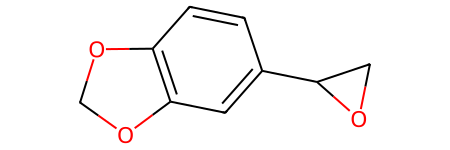

In [58]:
# Debugging finding attachment index
epoxide = 'c1cc2c(cc1C1CO1)OCO2'
whole_mol = 'OC[C@H](c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)C[C@@H](O)c1ccc2c(c1)OCO2'
whole_mol = Chem.MolFromSmiles(whole_mol)
epoxide = Chem.MolFromSmiles(epoxide)
epoxide

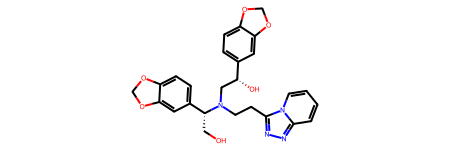

In [59]:
whole_mol

In [60]:
wholeMol2subMol = whole_mol.GetSubstructMatch(epoxide)
wholeMol2subMol

()

In [61]:
# Remove epoxide from submol
epoxide_pattern = Chem.MolFromSmarts("[O]1[C][C]1")
# Search for epoxide groups in the molecule
matches = epoxide.GetSubstructMatches(epoxide_pattern)
matches

((8, 7, 6),)

In [62]:
# If there are epoxide matches, remove them
if matches:
    # Remove the epoxide groups one by one
    for match in matches:
        # Extract the atoms to be removed
        atoms_to_remove = list(match)
        print(atoms_to_remove)
        # Find bond between epoxide and scaffold
        # Get carbon with 1 H
        for atom in atoms_to_remove:
            if epoxide.GetAtomWithIdx(atom).GetSymbol() == 'C':
                if epoxide.GetAtomWithIdx(atom).GetTotalNumHs() == 1:
                    attach_carbon = atom
                    atoms_to_remove.remove(atom)
        # # Get bond between epoxide and scaffold
        # for bond in epoxide.GetBonds():
        #     if bond.GetBeginAtomIdx() == attach_carbon or bond.GetEndAtomIdx() == attach_carbon:
        #         attach_bond = bond
        # Replace the epoxide with a dummy atom
        epoxide.GetAtomWithIdx(attach_carbon).SetAtomicNum(0)
        # Remove the atoms from the molecule
        # Remove the specified atoms
        epoxide = Chem.EditableMol(epoxide)
        for atom_index in sorted(atoms_to_remove, reverse=True):
            epoxide.RemoveAtom(atom_index)
        # Remove the atoms from the molecule
        #dummy = Chem.MolFromSmiles("C")
        #mol = AllChem.ReplaceSubstructs(epoxide, epoxide_pattern, dummy)

[8, 7, 6]


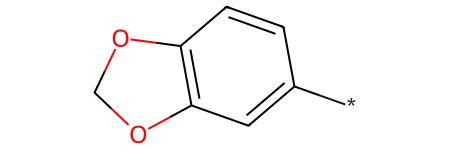

In [67]:
#epoxide = epoxide.GetMol()
epoxide

In [68]:
wholeMol2subMol = whole_mol.GetSubstructMatch(epoxide)
wholeMol2subMol

()

In [69]:
reaction_smarts

{'Amidation': '[#6:1](=[#8:2])-[#8;H1].[#7&X3;!$(NC=*);!$(NS):3]>>[#6:1](=[#8:2])-[#7X3:3]',
 'Amide_schotten-baumann': '[#7;H2,H1:3].[#6:1](=[#8:2])-[#17]>>[#6:1](=[#8:2])-[#7:3]',
 'Reductive_amination': '[#6:2](=[#8])(-[#6:1]).[#7;H2,H1:3]>>[#6:2](-[#6:1])-[#7:3]',
 'N-nucleophilic_aromatic_substitution': '[#6:3]-[#7;H3,H2,H1:2].[c:1]-[F,Cl,Br,I]>>[#6:3]-[#7:2]-[c:1]',
 'Sp2-sp2_Suzuki_coupling': '[#6X3:1]-[F,Cl,Br,I].[#6X3:2]-[B](-[O])(-[O])>>[#6X3:1]-[#6X3:2]',
 'Formation_of_urea_from_two_amines': '[N&X3;H2,H1;!$(NC=O):3].[N&X3;H2,H1;!$(NC=O):4]>>[#7&X3:3]-[#6](=[#8])-[#7&X3:4]',
 'Sulfonamide_Schotten-Baumann_with_amine_(intermolecular)': '[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])[#17,#9].[#7&X3;H2,H1;!$(NC=*);!$(NS):5]>>[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])-[#7:5]',
 'Buchwald-Hartwig_amination': '[ar:1]-[Cl,Br,I].[#7&X3;H2,H1;!$(NC=*);!$(NS);!$(NN):7]>>[ar:1]-[N:7]',
 'Nucleophilic_substitution_with_thiol': '[Cl,Br]-[C;H2,H1;+0:1].[SH;+0:2]>>[S&X2;H0;D2;+0:2]-[C&X4;D2;+0:1]'

In [71]:
del reaction_smarts['Epoxide_+_amine_coupling_H1']

KeyError: 'Epoxide_+_amine_coupling_H1'

In [80]:
reaction_smarts['Epoxide_+_amine_coupling'] = '[C:1]-[CH;D3;+0:2]1-[CH2;D2;+0:3]-[O;H0;D2;+0:4]-1.[N&X3+0:6]-[C:7]>>[C:1]-[C;D3;+0:2](-[OH;D1;+0:4])-[CH2;D2;+0:3]-[N&X3;D3;+0:6]-[C:7]'
reaction_smarts

{'Amidation': '[#6:1](=[#8:2])-[#8;H1].[#7&X3;!$(NC=*);!$(NS):3]>>[#6:1](=[#8:2])-[#7X3:3]',
 'Amide_schotten-baumann': '[#7;H2,H1:3].[#6:1](=[#8:2])-[#17]>>[#6:1](=[#8:2])-[#7:3]',
 'Reductive_amination': '[#6:2](=[#8])(-[#6:1]).[#7;H2,H1:3]>>[#6:2](-[#6:1])-[#7:3]',
 'N-nucleophilic_aromatic_substitution': '[#6:3]-[#7;H3,H2,H1:2].[c:1]-[F,Cl,Br,I]>>[#6:3]-[#7:2]-[c:1]',
 'Sp2-sp2_Suzuki_coupling': '[#6X3:1]-[F,Cl,Br,I].[#6X3:2]-[B](-[O])(-[O])>>[#6X3:1]-[#6X3:2]',
 'Formation_of_urea_from_two_amines': '[N&X3;H2,H1;!$(NC=O):3].[N&X3;H2,H1;!$(NC=O):4]>>[#7&X3:3]-[#6](=[#8])-[#7&X3:4]',
 'Sulfonamide_Schotten-Baumann_with_amine_(intermolecular)': '[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])[#17,#9].[#7&X3;H2,H1;!$(NC=*);!$(NS):5]>>[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])-[#7:5]',
 'Buchwald-Hartwig_amination': '[ar:1]-[Cl,Br,I].[#7&X3;H2,H1;!$(NC=*);!$(NS);!$(NN):7]>>[ar:1]-[N:7]',
 'Nucleophilic_substitution_with_thiol': '[Cl,Br]-[C;H2,H1;+0:1].[SH;+0:2]>>[S&X2;H0;D2;+0:2]-[C&X4;D2;+0:1]'

In [81]:
with open('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/RXN_SMARTS_CONSTANTS.json', 'w') as f:
    json.dump(reaction_smarts, f)

# TESTING TO REACT TOGETHER

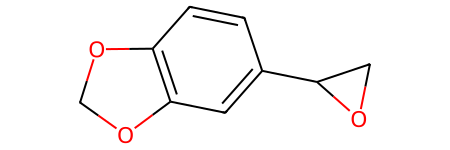

In [108]:
with open('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/RXN_SMARTS_CONSTANTS.json', 'r') as f:
    reaction_smarts = json.load(f)
r1 = 'c1cc2c(cc1C1CO1)OCO2'
r2 = 'OC(CNCCc1nnc2ccccn12)c1ccc2c(c1)OCO2'
r1 = Chem.MolFromSmiles(r1)
r2 = Chem.MolFromSmiles(r2)
r1

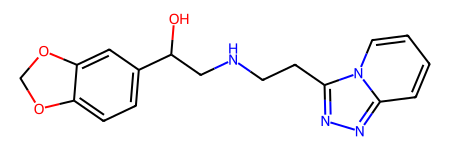

In [109]:
r2

In [110]:
# reaction_smarts['Epoxide_+_amine_coupling'] = '[#6:1]-[CH;D3;+0:2]1-[CH2;D2;+0:3]-[O;H0;D2;+0:4]-1.[N;H2,H1;+0:6]-[#6:7]>>[#6:1]-[C;+0:2](-[OH;D1;+0:4])-[C&X4;+0:3]-[N;H1,H0;+0:6]-[#6:7]'
rxn_smarts = reaction_smarts['Epoxide_+_amine_coupling']
rxn_smarts

'[#6:1]-[CH;D3;+0:2]1-[CH2;D2;+0:3]-[O;H0;D2;+0:4]-1.[N;H2,H1;+0:6]-[#6:7]>>[#6:1]-[C;+0:2](-[OH;D1;+0:4])-[C&X4;+0:3]-[N&X3;+0:6]-[#6:7]'

In [111]:
from rdkit.Chem import rdChemReactions
reaction = rdChemReactions.ReactionFromSmarts(rxn_smarts)
products = reaction.RunReactants((r1, r2))

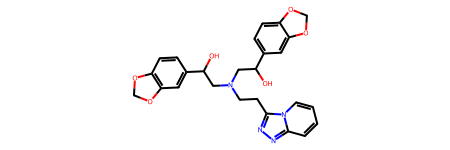

In [112]:
products[0][0]

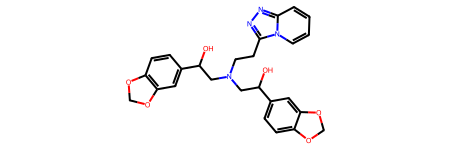

In [113]:
products[1][0]

# CHECK SULFONAMIDE SCHOTTEN BAUMANN

In [121]:
with open('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/RXN_SMARTS_CONSTANTS.json', 'r') as f:
    reaction_smarts = json.load(f)
reaction_smarts['Sulfonamide_Schotten-Baumann_with_amine_(intermolecular)'] = '[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])[#17,#9].[#7&X3;H2,H1;!$(NC=*);!$(NS):5]>>[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])-[#7&X3:5]'

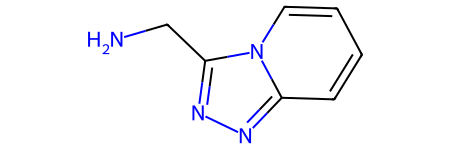

In [122]:
r1 = 'NCc1nnc2ccccn12'
r2 = 'Cc1ccc(CCS(=O)(=O)Cl)cc1'
r1 = Chem.MolFromSmiles(r1)
r2 = Chem.MolFromSmiles(r2)
r1

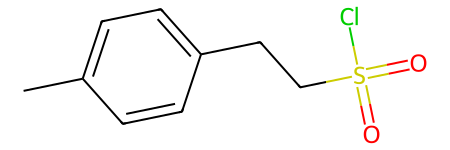

In [123]:
r2

In [124]:
rxn_smarts = reaction_smarts['Sulfonamide_Schotten-Baumann_with_amine_(intermolecular)']
rxn_smarts

'[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])[#17,#9].[#7&X3;H2,H1;!$(NC=*);!$(NS):5]>>[#16X4:1](=[OX1:2])(=[OX1:3])([#6,#7:4])-[#7&X3:5]'

In [125]:
rxn = AllChem.ReactionFromSmarts(rxn_smarts)
products = rxn.RunReactants((r1, r2))

In [127]:
products = rxn.RunReactants((r2, r1))

In [128]:
products

((<rdkit.Chem.rdchem.Mol at 0x283de2f20>,),
 (<rdkit.Chem.rdchem.Mol at 0x283de2c10>,))

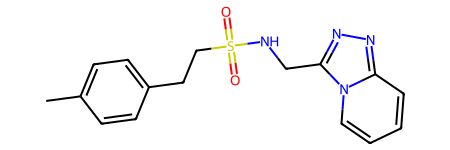

In [129]:
products[0][0]

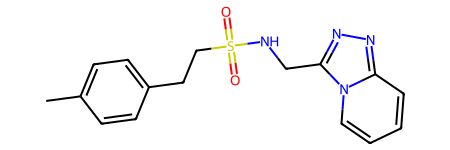

In [130]:
products[1][0]

# ADDING NUMBERS TO OUTPUTS ALREADY DONE

In [162]:
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data/D68EV3CPROA_enumeration_oct10_first_route_1_step_OUTPUT.csv', index_col=0)
df

,smiles,num_steps,rxn_order_first_to_last,reactants,BuildingBlocks,catalogName_for_BuildingBlock,dir_name,Done_Time,Analogs
0,Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2,1,['Formation of urea from two amines'],"[('NCCc1nnc2ccccn12', 'Cc1cc2c(cc1N)OCO2')]","['Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2', 'NC...","['enamine_real', 'molport', 'mcule', 'enamine_...",['ENAMINE:Z1637917899_x1140_0A_x1594_0A'],NaN,NaN
1,Cc1ccc(CCS(=O)(=O)NCc2nnc3ccccn23)cc1,1,['Sulfonamide Schotten-Baumann with amine (int...,"[('NCc1nnc2ccccn12', 'Cc1ccc(CCS(=O)(=O)Cl)cc1')]","['Cc1ccc(CCS(=O)(=O)Cl)cc1', 'Cc1ccc(CCS(=O)(=...","['enamine_made', 'enamine_bb', 'mcule', 'molpo...",['ENAMINE:Z2000385219_x1140_0A_x1594_0A'],NaN,NaN
2,OC[C@H](c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)C[C@...,1,['Epoxide + amine coupling'],"[('c1cc2c(cc1C1CO1)OCO2', 'OC(CNCCc1nnc2ccccn1...","['c1cc2c(cc1C1CO1)OCO2', 'OC(CNCCc1nnc2ccccn12...","['enamine_bb', 'mcule', 'enamine_made', 'enami...",['MOLPORT:009-117-950_x1140_0A_x1594_0A'],NaN,NaN
3,O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2,1,['Amidation'],"[('O=C(O)CSc1nnc2ccccn12', 'Nc1ccc2c(c1)OCO2')]","['O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2', 'Nc1c...","['enamine_bb', 'molport', 'mcule', 'enamine_re...","['MOLPORT:000-224-370_x1140_0A_x1594_0A', 'MOL...",NaN,NaN
4,O=C(NCc1nnc2ccccn12)c1ccc2c(c1)OCO2,1,['Amidation'],"[('O=C(O)c1ccc2c(c1)OCO2', 'NCc1nnc2ccccn12')]","['O=C(NCc1nnc2ccccn12)c1ccc2c(c1)OCO2', 'O=C(O...","['enamine_bb', 'enamine_real', 'mcule', 'mcule...",['MOLPORT:004-137-806_x1140_0A_x1594_0A'],NaN,NaN
...,...,...,...,...,...,...,...,...,...
592,CC(C)(C)OC(=O)C[C@](C)(C#N)C(=O)NCc1ccsn1,1,['Amidation'],"[('NCc1ccsn1', 'CC(C)(C)OC(=O)CC(C)(C#N)C(=O)O')]","['CC(C)(C)OC(=O)CC(C)(C#N)C(=O)O', 'NCc1ccsn1'...","['enamine_bb', 'mcule', 'molport', 'mcule', 'm...",['ENAMINE:Z3599345514_x1498_0A_x2021_0A'],NaN,NaN
593,COC(=O)NCC(=O)N1CCC[C@@H]1CNC(=O)Cc1cnsc1,1,['Amidation'],"[('O=C(O)Cc1cnsc1', 'COC(=O)NCC(=O)N1CCCC1CN')]","['COC(=O)NCC(=O)N1CCCC1CN', 'COC(=O)NCC(=O)N1C...","['enamine_real', 'enamine_made', 'enamine_real...",['ENAMINE:PV-002770714191_x1071_0A_x1498_0A'],NaN,NaN
594,CC(=O)Nc1ccc(-c2noc(CC[C@@H](C)N)n2)cc1,1,['Buchwald-Hartwig amidation with amide-like n...,"[('CC(N)CCc1nc(-c2ccc(Br)cc2)no1', 'CC(N)=O')]","['CC(=O)Nc1ccc(-c2noc(CCC(C)N)n2)cc1', 'CC(N)=...","['enamine_real', 'generic', 'enamine_bb', 'mcu...",['ENAMINE:Z2412805267_x1020_0A_x0130_0A'],NaN,NaN
595,C[C@@H](NS(C)(=O)=O)C(=O)N1CCC[C@@H](NC(=O)Cc2...,1,['Amidation'],"[('O=C(O)Cc1ccon1', 'CC(NS(C)(=O)=O)C(=O)N1CCC...","[None, 'O=C(O)Cc1ccon1', 'CC(NS(C)(=O)=O)C(=O)...","['enamine_made', 'enamine_bb', 'molport', 'mcu...",['ENAMINE:PV-001765474005_x1071_0A_x2099_0A'],NaN,NaN


In [163]:
import datetime
os.chdir('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/elabs/1_step')

In [164]:
# Enumerate through the parent directory
parent_directory = '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/elabs/1_step'  # Update this path
# Replace all colons with underscores
df['dir_name'] = df['dir_name'].str.replace(':', '_')
for root, dirs, files in os.walk(parent_directory):
    for directory in dirs:
        for index, row in df.iterrows():
            dir_names = eval(row['dir_name'])
            print(index)
            print(dir_names)
            if directory in dir_names:
                # If directory exists, go into the directory and find .csv
                csv_files = [f for f in os.listdir(os.path.join(root, directory)) if f.endswith('.csv')]
                for csv_file in csv_files:
                    try:
                        analog_number = int(csv_file.split('.')[0].split('_')[-1])  # Extract the integer
                        df.at[index, 'Analogs'] = analog_number
                        df.at[index, 'Done_Time'] = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    except ValueError:
                        pass
                break

0
['ENAMINE_Z1637917899_x1140_0A_x1594_0A']
1
['ENAMINE_Z2000385219_x1140_0A_x1594_0A']
2
['MOLPORT_009-117-950_x1140_0A_x1594_0A']
3
['MOLPORT_000-224-370_x1140_0A_x1594_0A', 'MOLPORT_000-224-370_x1594_0A_x1140_0A', 'MOLPORT_000-224-370_x1594_0A_x2021_0A', 'MOLPORT_000-224-370_x1594_0A_x1919_0A']
4
['MOLPORT_004-137-806_x1140_0A_x1594_0A']
5
['ENAMINE_Z1530202140_x1140_0A_x1594_0A']
6
['MOLPORT_009-117-950_x1594_0A_x1140_0A', 'MOLPORT_009-117-950_x1594_0A_x1919_0A']
7
['ENAMINE_PV-003073396135_x1140_0A_x1594_0A']
8
['ENAMINE_PV-002197219152_x1140_0A_x1594_0A']
9
['ENAMINE_Z1230717304_x0147_0A_x1140_0A', 'ENAMINE_Z1230717304_x0147_0A_x2021_0A', 'ENAMINE_Z1230717304_x0147_0A_x1919_0A']
10
['ENAMINE_Z978911310_x1594_0A_x1140_0A', 'ENAMINE_Z978911310_x1594_0A_x2021_0A', 'ENAMINE_Z978911310_x1594_0A_x1919_0A']
11
['MOLPORT_002-662-833_x1594_0A_x1140_0A', 'MOLPORT_002-662-833_x1594_0A_x1919_0A', 'MOLPORT_002-662-833_x1594_0A_x2021_0A']
12
['MOLPORT_002-662-194,ENAMINE_Z154331110_x1140_0A_x1

In [165]:
df

,smiles,num_steps,rxn_order_first_to_last,reactants,BuildingBlocks,catalogName_for_BuildingBlock,dir_name,Done_Time,Analogs
0,Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2,1,['Formation of urea from two amines'],"[('NCCc1nnc2ccccn12', 'Cc1cc2c(cc1N)OCO2')]","['Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2', 'NC...","['enamine_real', 'molport', 'mcule', 'enamine_...",['ENAMINE_Z1637917899_x1140_0A_x1594_0A'],2023-10-17 06:33:44,8236.0
1,Cc1ccc(CCS(=O)(=O)NCc2nnc3ccccn23)cc1,1,['Sulfonamide Schotten-Baumann with amine (int...,"[('NCc1nnc2ccccn12', 'Cc1ccc(CCS(=O)(=O)Cl)cc1')]","['Cc1ccc(CCS(=O)(=O)Cl)cc1', 'Cc1ccc(CCS(=O)(=...","['enamine_made', 'enamine_bb', 'mcule', 'molpo...",['ENAMINE_Z2000385219_x1140_0A_x1594_0A'],2023-10-17 06:33:45,7077.0
2,OC[C@H](c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)C[C@...,1,['Epoxide + amine coupling'],"[('c1cc2c(cc1C1CO1)OCO2', 'OC(CNCCc1nnc2ccccn1...","['c1cc2c(cc1C1CO1)OCO2', 'OC(CNCCc1nnc2ccccn12...","['enamine_bb', 'mcule', 'enamine_made', 'enami...",['MOLPORT_009-117-950_x1140_0A_x1594_0A'],2023-10-17 06:33:45,12.0
3,O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2,1,['Amidation'],"[('O=C(O)CSc1nnc2ccccn12', 'Nc1ccc2c(c1)OCO2')]","['O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2', 'Nc1c...","['enamine_bb', 'molport', 'mcule', 'enamine_re...","['MOLPORT_000-224-370_x1140_0A_x1594_0A', 'MOL...",2023-10-17 06:33:45,5256.0
4,O=C(NCc1nnc2ccccn12)c1ccc2c(c1)OCO2,1,['Amidation'],"[('O=C(O)c1ccc2c(c1)OCO2', 'NCc1nnc2ccccn12')]","['O=C(NCc1nnc2ccccn12)c1ccc2c(c1)OCO2', 'O=C(O...","['enamine_bb', 'enamine_real', 'mcule', 'mcule...",['MOLPORT_004-137-806_x1140_0A_x1594_0A'],2023-10-17 06:33:45,19152.0
...,...,...,...,...,...,...,...,...,...
592,CC(C)(C)OC(=O)C[C@](C)(C#N)C(=O)NCc1ccsn1,1,['Amidation'],"[('NCc1ccsn1', 'CC(C)(C)OC(=O)CC(C)(C#N)C(=O)O')]","['CC(C)(C)OC(=O)CC(C)(C#N)C(=O)O', 'NCc1ccsn1'...","['enamine_bb', 'mcule', 'molport', 'mcule', 'm...",['ENAMINE_Z3599345514_x1498_0A_x2021_0A'],NaN,NaN
593,COC(=O)NCC(=O)N1CCC[C@@H]1CNC(=O)Cc1cnsc1,1,['Amidation'],"[('O=C(O)Cc1cnsc1', 'COC(=O)NCC(=O)N1CCCC1CN')]","['COC(=O)NCC(=O)N1CCCC1CN', 'COC(=O)NCC(=O)N1C...","['enamine_real', 'enamine_made', 'enamine_real...",['ENAMINE_PV-002770714191_x1071_0A_x1498_0A'],NaN,NaN
594,CC(=O)Nc1ccc(-c2noc(CC[C@@H](C)N)n2)cc1,1,['Buchwald-Hartwig amidation with amide-like n...,"[('CC(N)CCc1nc(-c2ccc(Br)cc2)no1', 'CC(N)=O')]","['CC(=O)Nc1ccc(-c2noc(CCC(C)N)n2)cc1', 'CC(N)=...","['enamine_real', 'generic', 'enamine_bb', 'mcu...",['ENAMINE_Z2412805267_x1020_0A_x0130_0A'],NaN,NaN
595,C[C@@H](NS(C)(=O)=O)C(=O)N1CCC[C@@H](NC(=O)Cc2...,1,['Amidation'],"[('O=C(O)Cc1ccon1', 'CC(NS(C)(=O)=O)C(=O)N1CCC...","[None, 'O=C(O)Cc1ccon1', 'CC(NS(C)(=O)=O)C(=O)...","['enamine_made', 'enamine_bb', 'molport', 'mcu...",['ENAMINE_PV-001765474005_x1071_0A_x2099_0A'],NaN,NaN


In [166]:
df.to_csv('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data/D68EV3CPROA_enumeration_oct10_first_route_1_step_OUTPUT.csv')